In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression,  Lasso, Ridge,ElasticNet
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [595]:
df_test = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/test.csv', ";")
df_train = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/train.csv', ";")

In [596]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [597]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [598]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [599]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [600]:
df_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [601]:
df_train.drop_duplicates(inplace = True)

In [602]:
df_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [603]:
df_test.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [604]:
df_test.drop_duplicates(inplace= True)

In [605]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [606]:
df_test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [607]:
df_train['default'].unique()

array(['no', 'yes'], dtype=object)

In [608]:
df_train['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [609]:
df_train['default'] = df_train['default'].map({'no': 0, 'yes': 1})

In [610]:
df_test['default'] = df_test['default'].map({'no': 0, 'yes': 1})

In [611]:
df_train['loan']

0         no
1         no
2        yes
3         no
4         no
        ... 
45206     no
45207     no
45208     no
45209     no
45210     no
Name: loan, Length: 45211, dtype: object

In [612]:
df_train['housing'].unique()

array(['yes', 'no'], dtype=object)

In [613]:
df_train['housing'] = df_train['housing'].map({'no': 0, 'yes': 1})
df_test['housing'] = df_test['housing'].map({'no': 0, 'yes': 1})
df_train['loan'] = df_train['loan'].map({'no': 0, 'yes': 1})
df_test['loan'] = df_test['loan'].map({'no': 0, 'yes': 1})

In [614]:
df_train['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [615]:
df_train['job_code'] = df_train['job'].astype('category').cat.codes
df_test['job_code'] = df_test['job'].astype('category').cat.codes
df_train['marital_code'] = df_train['marital'].astype('category').cat.codes
df_test['marital_code'] = df_test['marital'].astype('category').cat.codes
df_train['education_code'] = df_train['education'].astype('category').cat.codes
df_test['education_code'] = df_test['education'].astype('category').cat.codes
df_train['contact_code'] = df_train['contact'].astype('category').cat.codes
df_test['contact_code'] = df_test['contact'].astype('category').cat.codes
df_train['month_code'] = df_train['month'].astype('category').cat.codes
df_test['month_code'] = df_test['month'].astype('category').cat.codes
df_train['poutcome_code'] = df_train['poutcome'].astype('category').cat.codes
df_test['poutcome_code'] = df_test['poutcome'].astype('category').cat.codes
df_train['y_code'] = df_train['y'].astype('category').cat.codes
df_test['y_code'] = df_test['y'].astype('category').cat.codes

In [616]:
df_train.dtypes

age                int64
job               object
marital           object
education         object
default            int64
balance            int64
housing            int64
loan               int64
contact           object
day                int64
month             object
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
y                 object
job_code            int8
marital_code        int8
education_code      int8
contact_code        int8
month_code          int8
poutcome_code       int8
y_code              int8
dtype: object

In [617]:
df_train = df_train.rename(columns={"y": "term_deposit"})
df_test = df_test.rename(columns={"y": "term_deposit"})

In [618]:
df_train['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [619]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,term_deposit,job_code,marital_code,education_code,contact_code,month_code,poutcome_code,y_code
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,unknown,no,4,1,2,2,8,3,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,unknown,no,9,2,1,2,8,3,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,unknown,no,2,1,1,2,8,3,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,unknown,no,1,1,3,2,8,3,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,unknown,no,11,2,3,2,8,3,0


In [620]:
df_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,term_deposit,job_code,marital_code,education_code,contact_code,month_code,poutcome_code,y_code
count,45211.000000,45211,45211,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000,...,45211.000000,45211,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
unique,NaN,12,3,4,NaN,NaN,NaN,NaN,3,NaN,...,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,blue-collar,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,...,NaN,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9732,27214,23202,NaN,NaN,NaN,NaN,29285,NaN,...,NaN,36959,39922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.936210,NaN,NaN,NaN,0.018027,1362.272058,0.555838,0.160226,NaN,15.806419,...,0.580323,NaN,NaN,4.339762,1.167725,1.224813,0.640242,5.523014,2.559974,0.116985
std,10.618762,NaN,NaN,NaN,0.133049,3044.765829,0.496878,0.366820,NaN,8.322476,...,2.303441,NaN,NaN,3.272657,0.608230,0.747997,0.897951,3.006911,0.989059,0.321406
min,18.000000,NaN,NaN,NaN,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,NaN,NaN,NaN,0.000000,72.000000,0.000000,0.000000,NaN,8.000000,...,0.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000
50%,39.000000,NaN,NaN,NaN,0.000000,448.000000,1.000000,0.000000,NaN,16.000000,...,0.000000,NaN,NaN,4.000000,1.000000,1.000000,0.000000,6.000000,3.000000,0.000000
75%,48.000000,NaN,NaN,NaN,0.000000,1428.000000,1.000000,0.000000,NaN,21.000000,...,0.000000,NaN,NaN,7.000000,2.000000,2.000000,2.000000,8.000000,3.000000,0.000000


In [621]:
df_test.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,term_deposit,job_code,marital_code,education_code,contact_code,month_code,poutcome_code,y_code
count,4521.000000,4521,4521,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521.000000,...,4521.000000,4521,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
unique,NaN,12,3,4,NaN,NaN,NaN,NaN,3,NaN,...,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,...,NaN,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,969,2797,2306,NaN,NaN,NaN,NaN,2896,NaN,...,NaN,3705,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,41.170095,NaN,NaN,NaN,0.016810,1422.657819,0.566025,0.152842,NaN,15.915284,...,0.542579,NaN,NaN,4.411192,1.147755,1.231365,0.652289,5.540146,2.559168,0.115240
std,10.576211,NaN,NaN,NaN,0.128575,3009.638142,0.495676,0.359875,NaN,8.247667,...,1.693562,NaN,NaN,3.255716,0.599650,0.748744,0.901498,3.002763,0.992051,0.319347
min,19.000000,NaN,NaN,NaN,0.000000,-3313.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,NaN,NaN,NaN,0.000000,69.000000,0.000000,0.000000,NaN,9.000000,...,0.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000
50%,39.000000,NaN,NaN,NaN,0.000000,444.000000,1.000000,0.000000,NaN,16.000000,...,0.000000,NaN,NaN,4.000000,1.000000,1.000000,0.000000,6.000000,3.000000,0.000000
75%,49.000000,NaN,NaN,NaN,0.000000,1480.000000,1.000000,0.000000,NaN,21.000000,...,0.000000,NaN,NaN,7.000000,2.000000,2.000000,2.000000,8.000000,3.000000,0.000000


In [622]:
df_train.dtypes

age                int64
job               object
marital           object
education         object
default            int64
balance            int64
housing            int64
loan               int64
contact           object
day                int64
month             object
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
term_deposit      object
job_code            int8
marital_code        int8
education_code      int8
contact_code        int8
month_code          int8
poutcome_code       int8
y_code              int8
dtype: object

In [623]:
df_train['default'].unique()

array([0, 1])

In [624]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,term_deposit,job_code,marital_code,education_code,contact_code,month_code,poutcome_code,y_code
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,unknown,no,4,1,2,2,8,3,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,unknown,no,9,2,1,2,8,3,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,unknown,no,2,1,1,2,8,3,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,unknown,no,1,1,3,2,8,3,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,unknown,no,11,2,3,2,8,3,0


<Axes: >

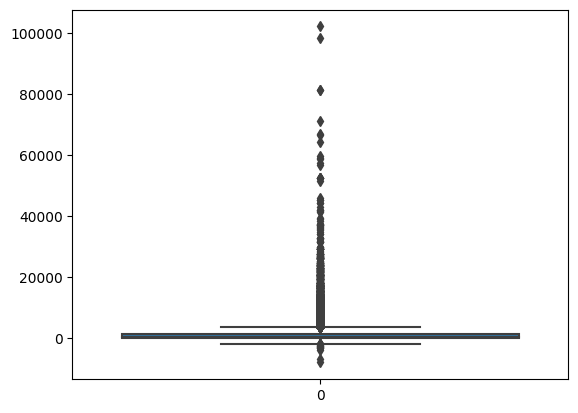

In [625]:
sns.boxplot(df_train['balance'])

<Axes: >

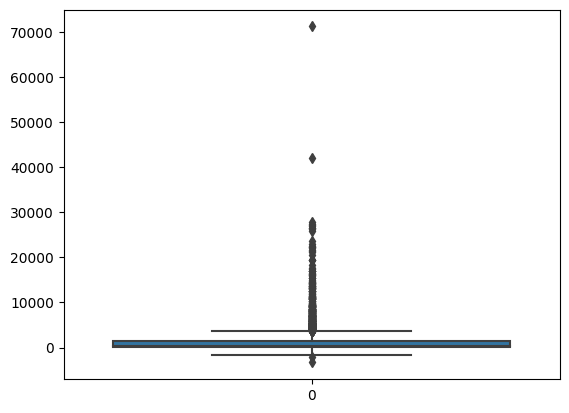

In [626]:
sns.boxplot(df_test['balance'])

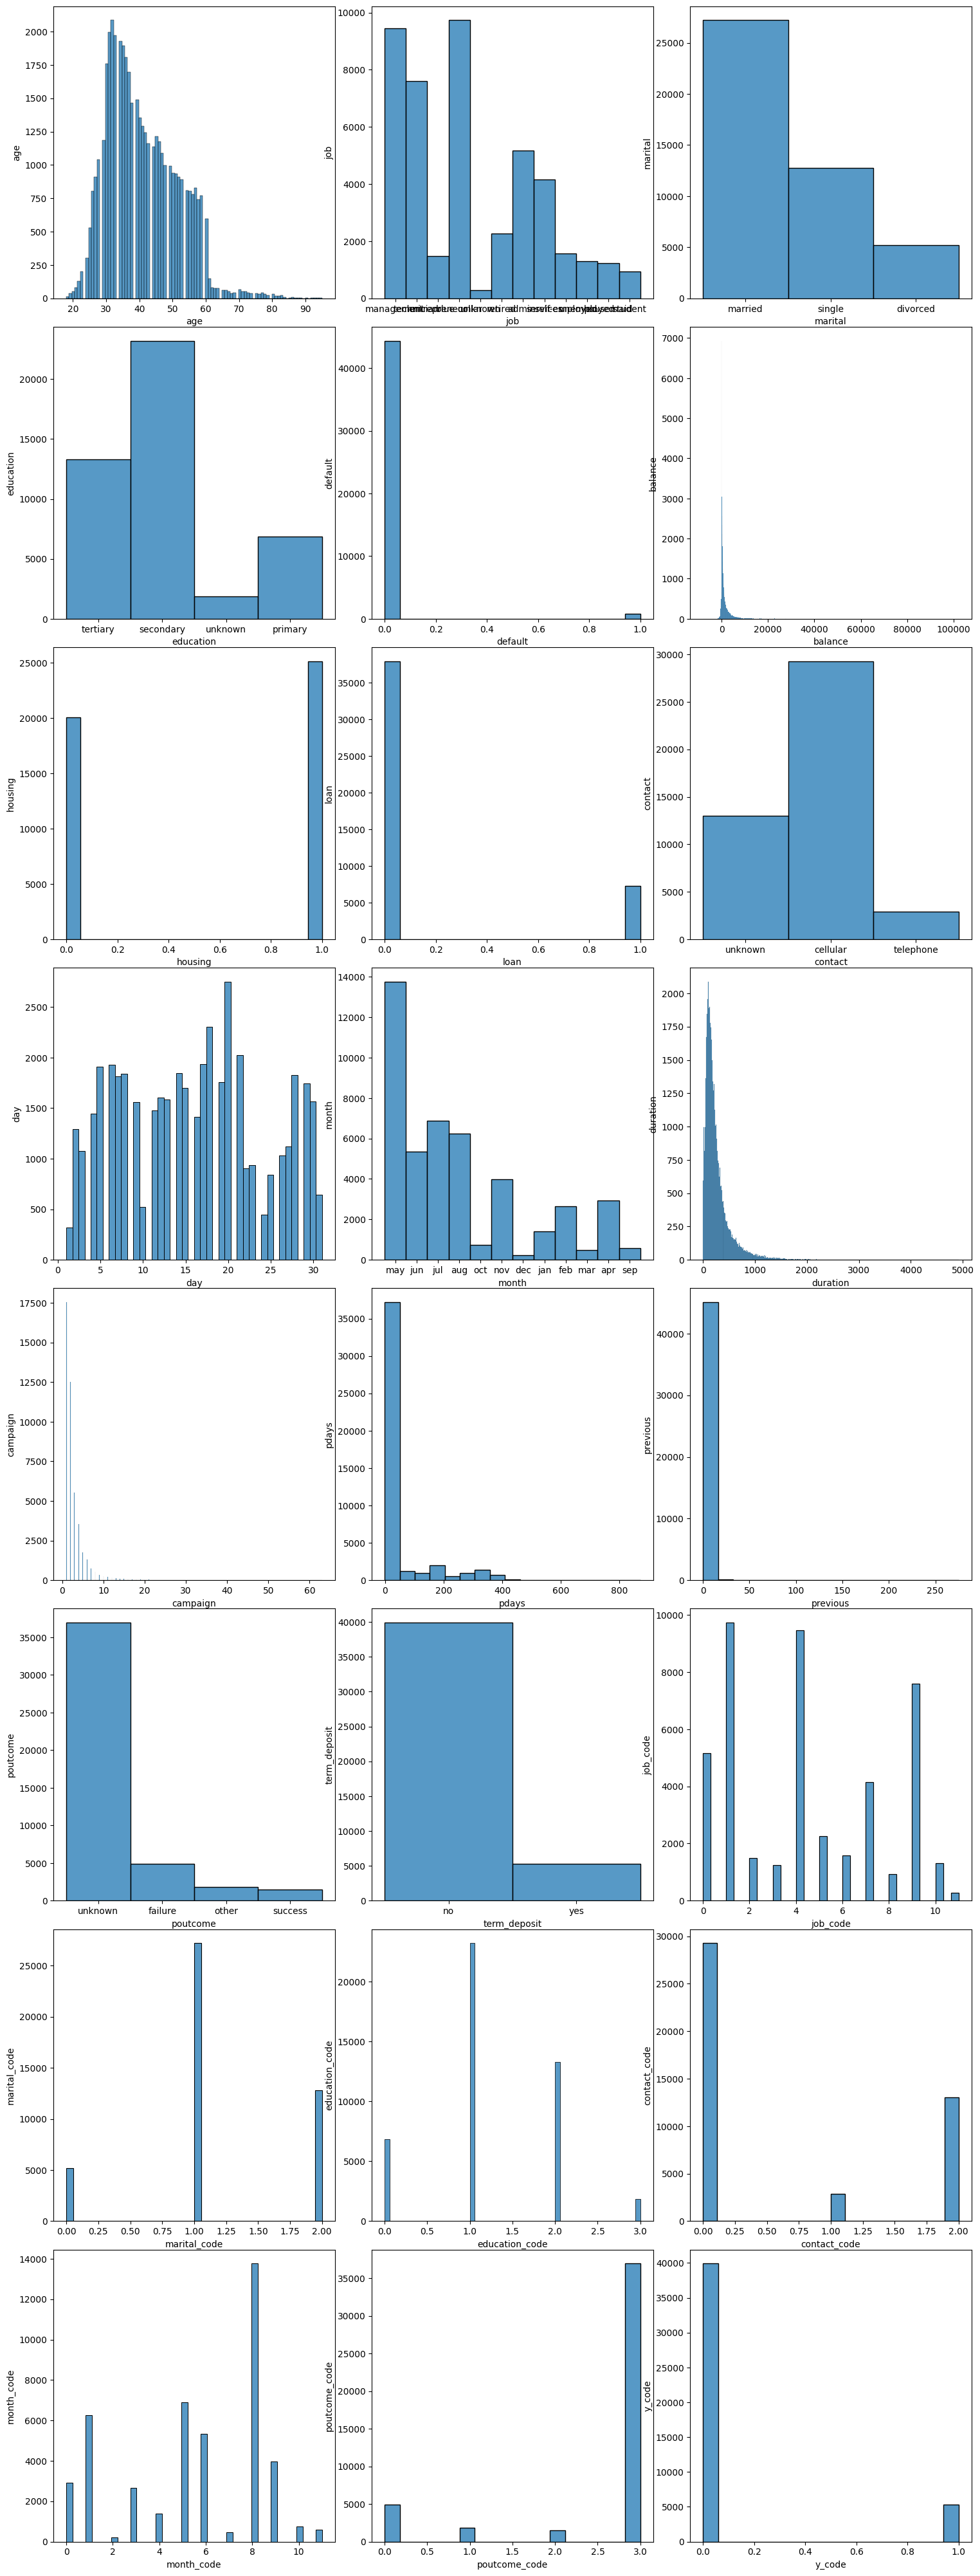

In [627]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df_train, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
plt.show()

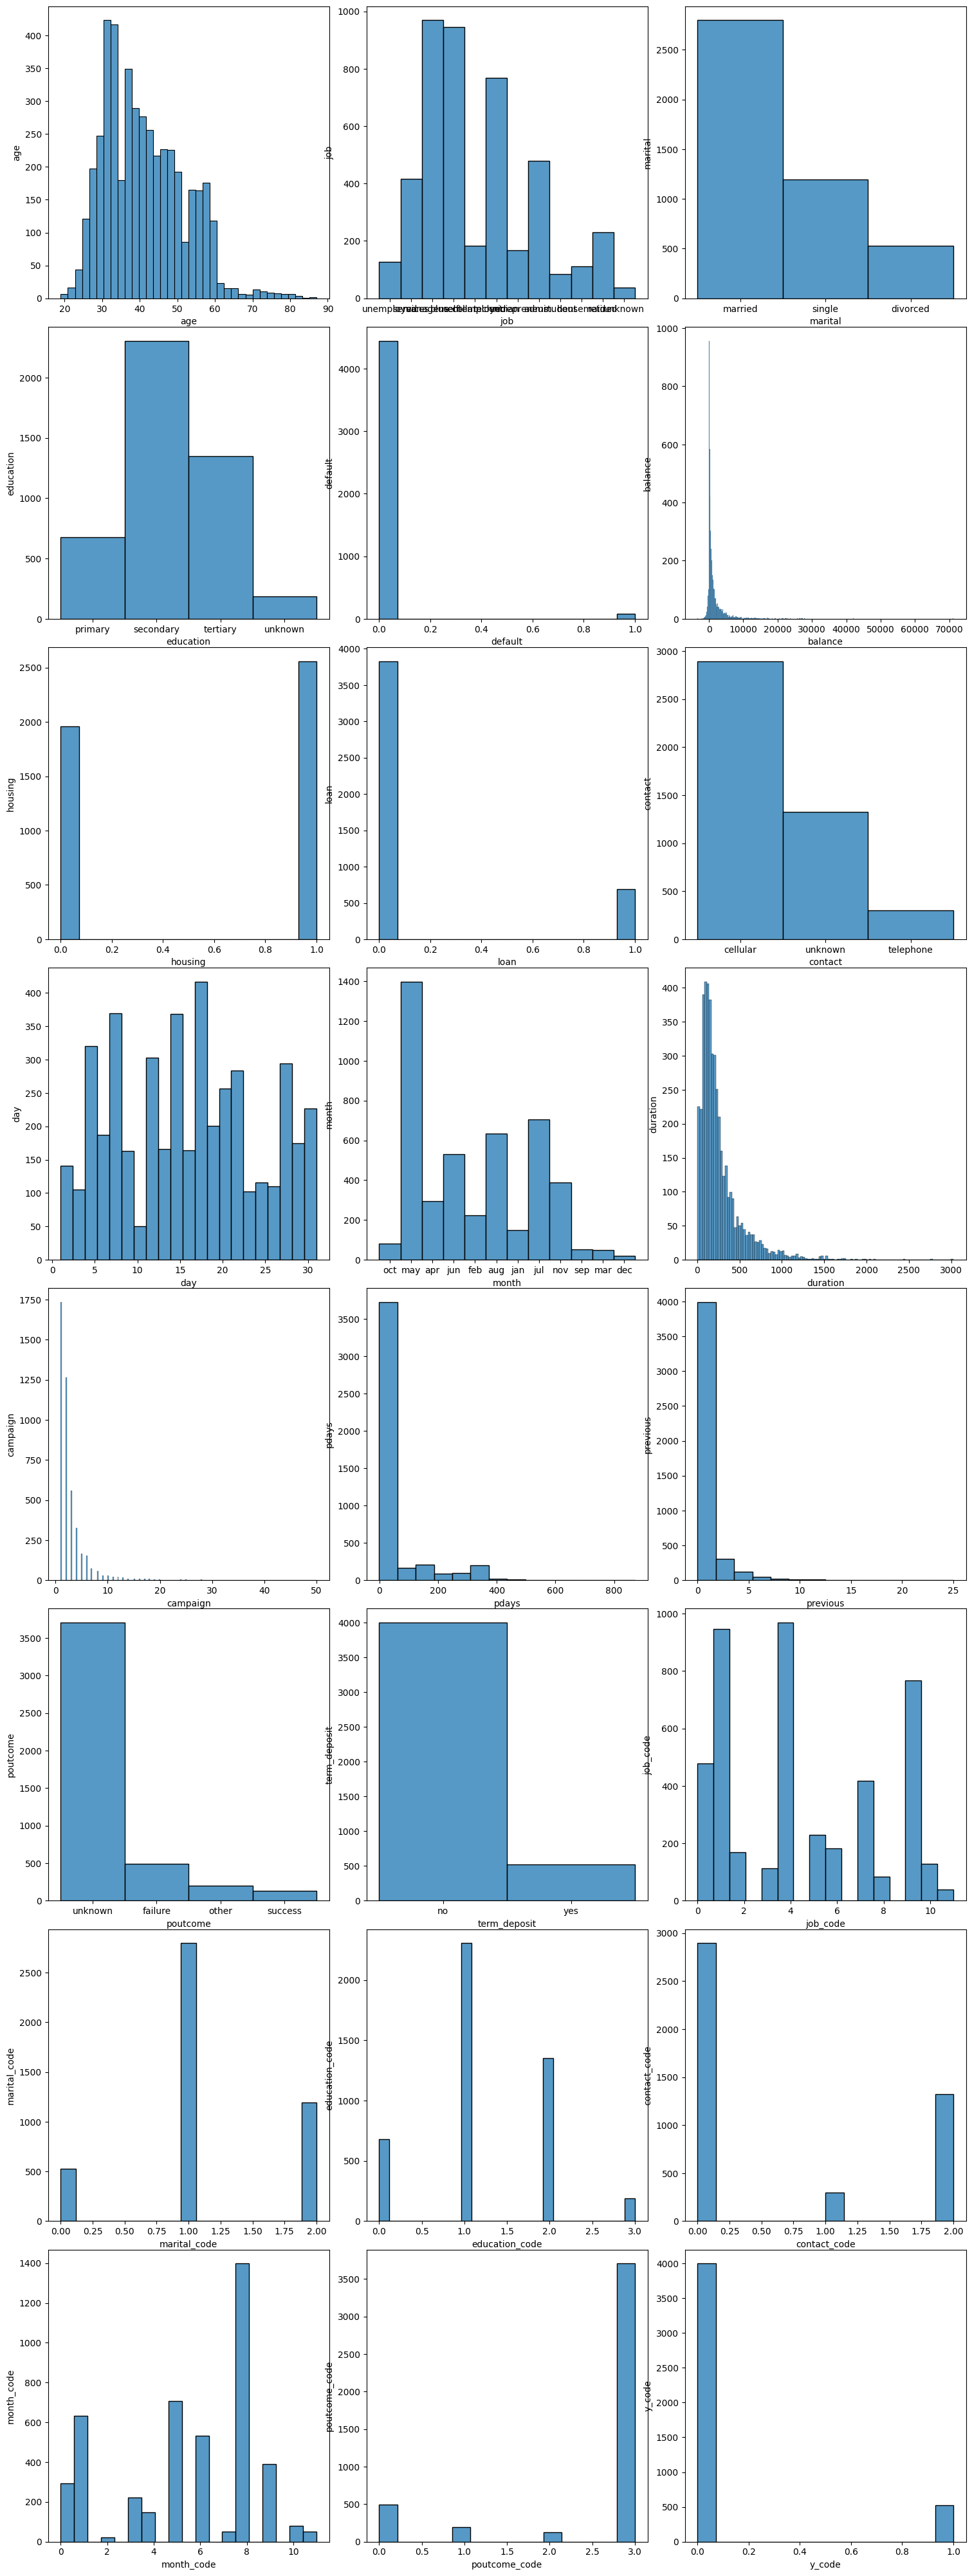

In [628]:
columns = df_test.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df_test, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
plt.show()

In [629]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education       45211 non-null  object
 4   default         45211 non-null  int64 
 5   balance         45211 non-null  int64 
 6   housing         45211 non-null  int64 
 7   loan            45211 non-null  int64 
 8   contact         45211 non-null  object
 9   day             45211 non-null  int64 
 10  month           45211 non-null  object
 11  duration        45211 non-null  int64 
 12  campaign        45211 non-null  int64 
 13  pdays           45211 non-null  int64 
 14  previous        45211 non-null  int64 
 15  poutcome        45211 non-null  object
 16  term_deposit    45211 non-null  object
 17  job_code        45211 non-null  int8  
 18  marita

In [630]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,term_deposit,job_code,marital_code,education_code,contact_code,month_code,poutcome_code,y_code
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,unknown,no,4,1,2,2,8,3,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,unknown,no,9,2,1,2,8,3,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,unknown,no,2,1,1,2,8,3,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,unknown,no,1,1,3,2,8,3,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,unknown,no,11,2,3,2,8,3,0


In [631]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'job_code', 'marital_code',
       'education_code', 'contact_code', 'month_code', 'poutcome_code',
       'y_code'],
      dtype='object')

In [632]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [633]:
cat_columns = ['job_code', 'marital_code', 'education_code', 'default', 'housing', 'loan', 'contact_code', 'day', 'month_code', 'campaign','poutcome_code']
num_columns = ['balance', 'pdays', 'previous']
target = 'term_deposit'

In [634]:
X_train = df_train[cat_columns + num_columns]
X_test = df_test[cat_columns + num_columns]
y_train = df_train[target]
y_test = df_test[target]

In [635]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [636]:
y_test.count()
y_train.count()

45211

In [637]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [638]:
log_reg = linear_model.LogisticRegression(solver = 'newton-cg', max_iter=50)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [639]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred_log) * 100)

Logistic Regression Model Accuracy (in %): 88.40964388409644


In [640]:
 print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      4000
         yes       0.20      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.54      0.50      0.47      4521
weighted avg       0.81      0.88      0.83      4521



In [641]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [642]:
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred_knn) * 100)

KNN Model Accuracy (in %): 88.54235788542358


In [643]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      4000
         yes       1.00      0.01      0.01       521

    accuracy                           0.89      4521
   macro avg       0.94      0.50      0.48      4521
weighted avg       0.90      0.89      0.83      4521



In [644]:
rforest = RandomForestClassifier(n_estimators = 200)
rforest.fit(X_train, y_train)
y_pred_forest = rforest.predict(X_test)

In [645]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred_forest) * 100)

Random Forest Model Accuracy (in %): 100.0


In [646]:
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))

Classification Report:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [647]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [648]:
adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.01)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
print("AdaBoost Model Accuracy (in %):", metrics.accuracy_score(y_test, y_pred_ada) * 100)


AdaBoost Model Accuracy (in %): 88.47600088476001


In [649]:
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

Classification Report:
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      4000
         yes       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



In [650]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error

In [651]:
bagging_regressor = BaggingRegressor(n_estimators=200)

bagging_regressor.fit(X_train, y_train)

y_pred_bag = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_bag)
print("Bagging Regressor Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred_bag, squared=False)
print("Bagging Regressor Root Mean Squared Error:", rmse)


ValueError: could not convert string to float: 'no'